In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from matplotlib import *

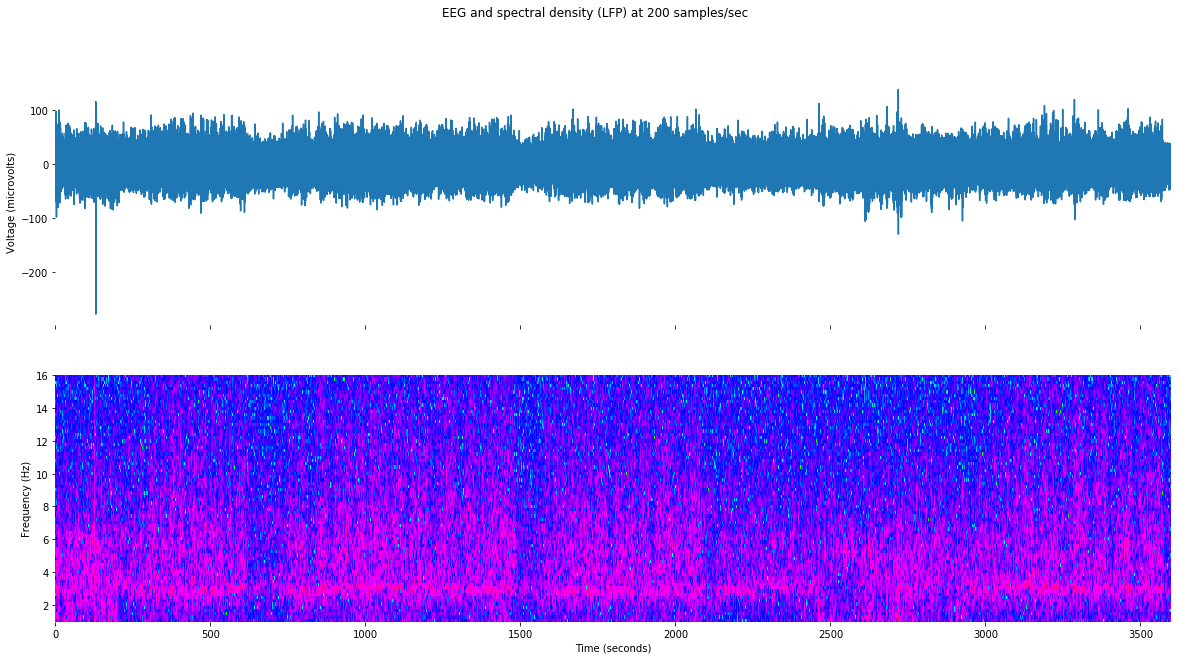

In [122]:

# modified specgram()
def my_specgram(x, NFFT=400, Fs=200, Fc=0, detrend=mlab.detrend_none,
             window=mlab.window_hanning, noverlap=200,
             cmap=None, xextent=None, pad_to=None, sides='default',
             scale_by_freq=None, minfreq = None, maxfreq = None, **kwargs):
    """
    call signature::

      specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
               window=mlab.window_hanning, noverlap=128,
               cmap=None, xextent=None, pad_to=None, sides='default',
               scale_by_freq=None, minfreq = None, maxfreq = None, **kwargs)

    Compute a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the PSD of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*.

    %(PSD)s

      *Fc*: integer
        The center frequency of *x* (defaults to 0), which offsets
        the y extents of the plot to reflect the frequency range used
        when a signal is acquired and then filtered and downsampled to
        baseband.

      *cmap*:
        A :class:`matplotlib.cm.Colormap` instance; if *None* use
        default determined by rc

      *xextent*:
        The image extent along the x-axis. xextent = (xmin,xmax)
        The default is (0,max(bins)), where bins is the return
        value from :func:`mlab.specgram`

      *minfreq, maxfreq*
        Limits y-axis. Both required

      *kwargs*:

        Additional kwargs are passed on to imshow which makes the
        specgram image

      Return value is (*Pxx*, *freqs*, *bins*, *im*):

      - *bins* are the time points the spectrogram is calculated over
      - *freqs* is an array of frequencies
      - *Pxx* is a len(times) x len(freqs) array of power
      - *im* is a :class:`matplotlib.image.AxesImage` instance

    Note: If *x* is real (i.e. non-complex), only the positive
    spectrum is shown.  If *x* is complex, both positive and
    negative parts of the spectrum are shown.  This can be
    overridden using the *sides* keyword argument.

    **Example:**

    .. plot:: mpl_examples/pylab_examples/specgram_demo.py

    """

    #####################################
    # modified  axes.specgram() to limit
    # the frequencies plotted
    #####################################

    # this will fail if there isn't a current axis in the global scope
    ax = gca()
    Pxx, freqs, bins = mlab.specgram(x, NFFT, Fs, detrend,
         window, noverlap, pad_to, sides, scale_by_freq)

    # modified here
    #####################################
    if minfreq is not None and maxfreq is not None:
        Pxx = Pxx[(freqs >= minfreq) & (freqs <= maxfreq)]
        freqs = freqs[(freqs >= minfreq) & (freqs <= maxfreq)]
    #####################################

    Z = 10. * np.log10(Pxx)
    Z = np.flipud(Z)

    if xextent is None: xextent = 0, np.amax(bins)
    xmin, xmax = xextent
    freqs += Fc
    extent = xmin, xmax, freqs[0], freqs[-1]
    im = ax.imshow(Z, cmap, extent=extent, **kwargs)
    ax.axis('auto')

    return Pxx, freqs, bins, im

########################################################################

eegdat = np.load('EEGhr40.npy', allow_pickle = True)

window_length = 5 # n seconds in windowing segments
noverlap = 4.9 # step size in sec


Fs = 200
dt = 1/fs
t_elapsed = eegdat.shape[0]/200
t = np.arange(0.0, t_elapsed, dt)
noverlap = noverlap * fs

NFFT = window_length * fs       # the length of the windowing segments

minfreq = 1 # min freq in Hz
maxfreq = 16 # max freq in Hz


# plot
fig, ax = plt.subplots(ncols = 1, nrows=2, figsize=[20,10], sharex=True)
ax[0].plot(t, eegdat)

ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Frequency (Hz)')
ax[0].set_ylabel('Voltage (microvolts)')

fig.suptitle(f'EEG and spectral density (LFP) at {Fs} samples/sec')
# good color maps appear to be:
# 'Spectral'
# 'viridis'
# 'hsv'

sns.despine(top=True, right=True, left=True, bottom=True)

# the minfreq and maxfreq args will limit the frequencies 
Pxx, freqs, bins, im = my_specgram(eegdat, NFFT=NFFT, Fs=Fs, noverlap=noverlap, 
                                cmap=cm.get_cmap('hsv'), minfreq = minfreq, maxfreq = maxfreq,
                                xextent = (0,np.int(t_elapsed)) )
show()
close()

